In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
db = pd.read_excel(r"C:\Users\ANISH\Downloads\fruits.xlsx")
db.head()
features = ['width','color_score']
X = db[features]
y = db.iloc[:,0]
#print(x)
#print(y)
v1=X
v2=y

In [3]:
db.columns

Index(['fruit_label', 'fruit_name', 'mass', 'width', 'height', 'color_score'], dtype='object')

In [4]:
db.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


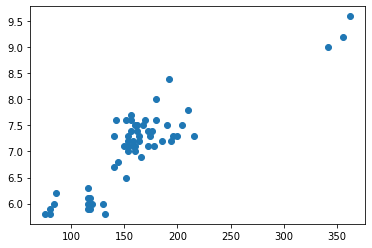

In [5]:
%matplotlib inline

plt.scatter(db['mass'],db['width'])

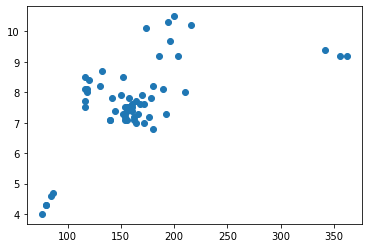

In [6]:
plt.scatter(db['mass'],db['height'])

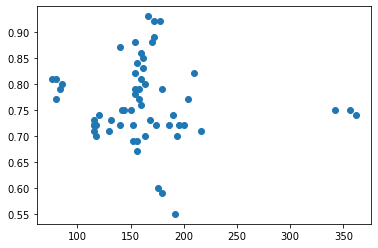

In [7]:
plt.scatter(db['mass'],db['color_score'])

In [8]:
db.iloc[:,1:].corr()

,mass,width,height,color_score
mass,1.000000,0.877687,0.609571,-0.079794
width,0.877687,1.000000,0.396848,-0.076576
height,0.609571,0.396848,1.000000,-0.247047
color_score,-0.079794,-0.076576,-0.247047,1.000000


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
def euclid_dist(v1,v2):
    dist = np.sqrt(np.sum((v1-v2)**2))
    return dist




In [12]:
def knn_predict(X_train, X_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclid_dist(test_point, train_point)
            distances.append(distance)
        
        # Storing distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances and considering the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test
y_hat_test=knn_predict(X_train, X_test, y_train, y_test, 3)


In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_hat_test))

Accuracy: 0.9166666666666666


In [18]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

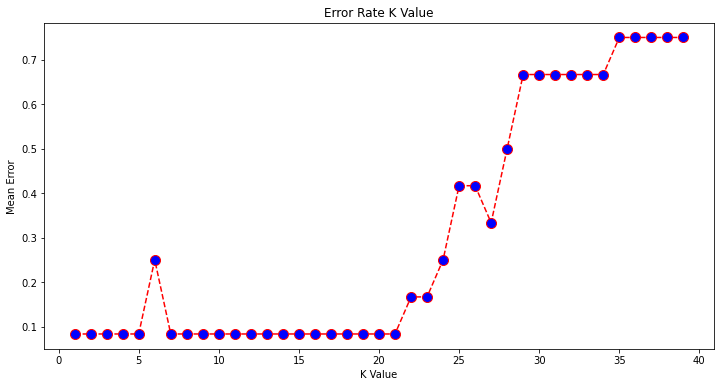

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')